## KNN Classifier using SciKit API

### Submitted By: Stuti Sanghavi

## Exploratory Data Analysis

In [1]:
#----------------------------------Importing all the required libraries------------------------------------------#
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
#-------------------------Reading in the file and looking at the head of the train data---------------------------#
train_data = pd.read_csv('pendigits_train.csv', header = None )
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [3]:
#-----------------------------------------Dropping the Y column-------------------------------------------------------#
X_train = train_data.drop(columns = [16])
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0


In [4]:
#------------------------------------------Assigning actual Y variable-------------------------------------------#
y_train = train_data[16]
y_train.head()

0    8
1    2
2    1
3    4
4    1
Name: 16, dtype: int64

In [5]:
#------------------------------------Checking if the data imported has 10 classes--------------------------------#
y_train.nunique()

10

In [6]:
#-----------------------------Checking the observations and dimensions for X_training set------------------------#
X_train.shape
print('There are ' + str(X_train.shape[0]) + ' observations and '\
      + str(X_train.shape[1]) + ' dimensions in the X training set')

There are 7494 observations and 16 dimensions in the X training set


In [7]:
#---------------------------Checking the observations and dimensions for y_training set------------------------#
y_train.shape

(7494,)

In [8]:
#-------------------------Reading in the file and looking at the head of the test data---------------------------#
test_data = pd.read_csv('pendigits_test.csv', header = None )
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


In [9]:
#-----------------------------------------Dropping the Y column-------------------------------------------------------#
X_test = test_data.drop(columns = [16])
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0


In [10]:
#------------------------------------------Assigning actual Y variable-------------------------------------------#
y_test = test_data[16]
y_test.head()

0    8
1    8
2    8
3    9
4    9
Name: 16, dtype: int64

In [11]:
#-----------------------------Checking the observations and dimensions for X_test set------------------------#
X_test.shape
print('There are ' + str(X_test.shape[0]) + ' observations and '\
      + str(X_test.shape[1]) + ' dimensions in the X testing set')

There are 3498 observations and 16 dimensions in the X testing set


In [12]:
#---------------------------Checking the observations and dimensions for y_test set------------------------#
y_test.shape

(3498,)

## Data Normalization

In [13]:
#------------------------ Calculating the mean and stdev for each dimension ------------------------------#
mean = X_train.mean()
std = X_train.std()

In [14]:
#------------------------- Calculating the normalized values in X_train data----------------------------#
normalized_X_train = (X_train - mean)/std
normalized_X_train.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.288569,0.909323,-0.495338,-0.096214,0.17527,-1.024367,-0.830241,-1.454678,-1.696241,-0.4031,-0.145901,0.626201,2.004455,1.631347,-0.16406,1.938914


In [15]:
#----------- Calculating the normalized values in X_test data using the same mean and stdev values---------------------#
normalized_X_test = (X_test - mean)/std
normalized_X_test.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.518986,0.434501,-1.4475,0.820349,-0.9986,0.034903,1.386182,-0.247874,0.382123,-1.240682,-1.654084,-0.428505,-0.561942,0.87887,1.280616,1.994762


## Let's create a classifier using k-Nearest Neighbors algorithm

### First let us first observe the accuracies for different values of k

In [16]:
neighbors = np.arange(1,10)
for i,k in enumerate(neighbors):
   print("i=", i)
   print("k=", k)

i= 0
k= 1
i= 1
k= 2
i= 2
k= 3
i= 3
k= 4
i= 4
k= 5
i= 5
k= 6
i= 6
k= 7
i= 7
k= 8
i= 8
k= 9


In [17]:
#------------------------------------ Calculating accuracies-----------------------------------------#

#Setup arrays to store training and test accuracies
#neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(normalized_X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(normalized_X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(normalized_X_test, y_test)

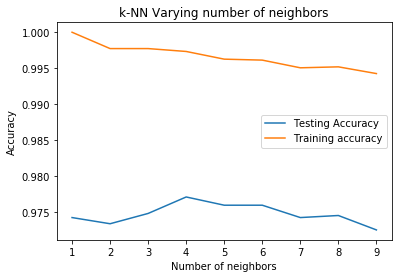

In [18]:
#------------------------------------Generating plot----------------------------------------------------------#
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

## Observation of K

In [19]:
#---------------------------Setting up the classifier-------------------------------------------------#

# We can observe above that we get maximum testing accuracy for k=4. 
# So lets create a KNeighborsClassifier with number of neighbors as 4.

#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=4)

In [20]:
#-----------------------------------Fitting the model-----------------------------------------------------------#
knn.fit(normalized_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [21]:
#---------------------------------------- Getting accuracy -------------------------------------------------# 
# Note: In case of classification algorithms score method represents accuracy.
print('The accuracy with 4-NN is ' + str(knn.score(normalized_X_test,y_test)*100) + ' %')

The accuracy with 4-NN is 97.71297884505432 %


## Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.

In [22]:
#-------------------Let us get the predictions using the classifier we had fit above--------------------------#
y_pred = knn.predict(normalized_X_test)

In [23]:
# --------------------------------- Confusion Matrix and errors ----------------------------------------------------------#
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
      
confusion_matrix(y_test,y_pred)

#Other method of getting confusion matrix is as follows:
#pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Misclassified samples: 80


array([[353,   0,   0,   0,   0,   0,   3,   0,   2,   5],
       [  0, 355,   7,   0,   1,   0,   0,   1,   0,   0],
       [  0,   3, 361,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0, 333,   0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0, 354,   8,   2,   0,   0,   0],
       [  0,   0,   0,   6,   0, 328,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 336,   0,   0,   0],
       [  0,  14,   2,   0,   2,   0,   0, 346,   0,   0],
       [  1,   0,   0,   0,   1,   1,   0,   0, 333,   0],
       [  0,   4,   0,   4,   0,   5,   0,   3,   1, 319]], dtype=int64)

- In a confusion matrix, the predicted class labels are written along the top (column names). The true class labels are written along the left side of the matrix. Each cell in the matrix is a count of how many instances of a true class were classified as each of the predicted classes. 

- A perfect classification will produce a confusion matrix with all zeros except on the diagonal. A confused classification will have large values not on the diagonal. 

- Most of our values are on the diagonal indicating a very high classification

#### We see from above that out of a total of 3498 test objects, there is a misclassification for only 80 of them. And all of the remaining 3418 test objects are on the diagonal, which means all of them are accurately predicted and hence the accuracy score is 97.71 %

## Classification Report

In [24]:
#----------- Building a text report showing the main classification metrics----------------------------#
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       363
           1       0.94      0.98      0.96       364
           2       0.98      0.99      0.98       364
           3       0.97      0.99      0.98       336
           4       0.99      0.97      0.98       364
           5       0.96      0.98      0.97       335
           6       0.99      1.00      0.99       336
           7       0.99      0.95      0.97       364
           8       0.99      0.99      0.99       336
           9       0.98      0.95      0.96       336

    accuracy                           0.98      3498
   macro avg       0.98      0.98      0.98      3498
weighted avg       0.98      0.98      0.98      3498



## Checking if our finding from above match the value we get here for optimal k

In [25]:
for K in range(20):
    K_value = K+1
    knn = KNeighborsClassifier(n_neighbors = K_value)
    knn.fit(normalized_X_train, y_train) 
    y_pred = knn.predict(normalized_X_test)
    print("Accuracy is ", (accuracy_score(y_test,y_pred))*100,"% for K-Value:",K_value)

Accuracy is  97.42710120068611 % for K-Value: 1
Accuracy is  97.34133790737565 % for K-Value: 2
Accuracy is  97.48427672955975 % for K-Value: 3
Accuracy is  97.71297884505432 % for K-Value: 4
Accuracy is  97.59862778730704 % for K-Value: 5
Accuracy is  97.59862778730704 % for K-Value: 6
Accuracy is  97.42710120068611 % for K-Value: 7
Accuracy is  97.45568896512292 % for K-Value: 8
Accuracy is  97.25557461406518 % for K-Value: 9
Accuracy is  97.19839908519154 % for K-Value: 10
Accuracy is  97.08404802744425 % for K-Value: 11
Accuracy is  97.05546026300743 % for K-Value: 12
Accuracy is  96.99828473413379 % for K-Value: 13
Accuracy is  96.94110920526015 % for K-Value: 14
Accuracy is  96.79817038307604 % for K-Value: 15
Accuracy is  96.85534591194968 % for K-Value: 16
Accuracy is  96.62664379645511 % for K-Value: 17
Accuracy is  96.7409948542024 % for K-Value: 18
Accuracy is  96.68381932532876 % for K-Value: 19
Accuracy is  96.62664379645511 % for K-Value: 20


After using different K values from 1- 20, we see that for the value of K = 4, we get the maximum accuracy of 97.71 %. This matches our initial finding of K = 4 and we see that increasing K doesn't help increase the accuracy.

### Hence our highest accuracy of 97.71% is achieved with an optimal K = 4